## Part 1 & 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
def cleanfirstquarter(x):
    
    #Change characters to lower case
    lst = []
    for i in x.columns:
        lst.append(i.lower())
    x.columns = lst

    #Deal with nan values
    x['months since last claim'] = x['months since last claim'].fillna(x['months since last claim'].mean())
    x['state'] = x['state'].fillna('U')
    x['response'] = x['response'].fillna('No')
    x['number of open complaints'] = x['number of open complaints'].fillna(0)
    x['vehicle class'] = x['vehicle class'].fillna('U')
    x['vehicle size'] = x['vehicle size'].fillna('U')
    x['vehicle type'] = x['vehicle size'].fillna('U')

    #change column to datetime and extract month
    x['effective to date'] = pd.to_datetime(x['effective to date'], errors='coerce')
    x['month'] = pd.DatetimeIndex(x['effective to date']).month
    x['month'] = x['month'].astype(int)
    filt = x[(x['month'].isin([1,2,3]))]
     
    #Check for unnamed 0 columns, if it's there, drop it
    for i in filt.columns:
        if i == 'unnamed: 0':
            filt.drop(columns = 'unnamed: 0', inplace=True)
    return filt

In [3]:
df1 = pd.read_csv('/Users/kitchphil/Labs-Ironhack/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
df1 = cleanfirstquarter(df1)
df1.head(3)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,Medsize,2


## Part 3

In [4]:
df2 = pd.read_csv('csv_files/marketing_customer_analysis.csv')
df2 = cleanfirstquarter(df2)
df2

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,Large,2


In [5]:
display(df1.shape)
display(df2.shape)

(10910, 26)

(9134, 26)

In [6]:
#show dataframe info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [7]:
#Describe the dataframe
df2.describe(include='all').T

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_5624/1384746414.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
customer,9134,9134,BU79786,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,9134,5,California,3150,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,9134.0,NaN,NaN,NaN,NaT,NaT,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
response,9134,2,No,7826,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,9134,3,Basic,5568,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9134,5,Bachelor,2748,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective to date,9134,59,2011-01-10 00:00:00,195,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,9134,5,Employed,5698,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9134,2,F,4658,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,9134.0,NaN,NaN,NaN,NaT,NaT,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


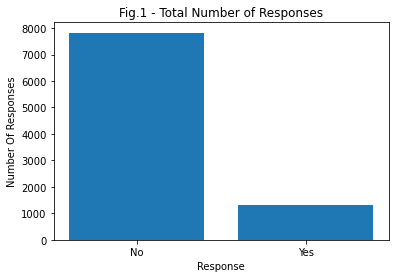

In [8]:
plt.bar(['No','Yes'], [df2['response'].value_counts()['No'],df2['response'].value_counts()['Yes']] )
plt.xlabel('Response')
plt.ylabel('Number Of Responses')
plt.title('Fig.1 - Total Number of Responses')
plt.show()

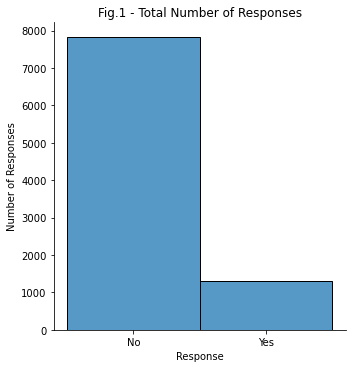

In [9]:
responsebar = sns.displot(df2['response'])
responsebar.set(title='Fig.1 - Total Number of Responses')
responsebar.set(xlabel= "Response", ylabel="Number of Responses")

[Text(0.5, 1.0, 'Fig 2. Response Rate By Sales Channel'),
 Text(0.5, 0, 'Sales Channel'),
 Text(0, 0.5, 'Responses')]

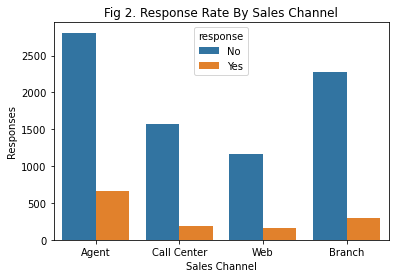

In [10]:
sns.countplot(data=df2, x='sales channel', hue='response').set(title='Fig 2. Response Rate By Sales Channel', xlabel='Sales Channel', ylabel='Responses')

In [11]:
#Transform the Boolean Values to 1 & 0
df2['response_rate'] = np.where(df2.response=='Yes',1,0)

In [12]:
df2['response_rate'] = df2['response_rate']*100


[Text(0.5, 1.0, 'Fig. 2 - Response Rate by Sales Channel')]

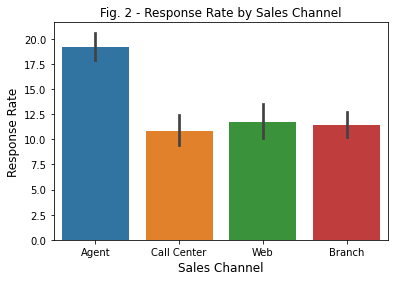

In [13]:
p = sns.barplot(data=df2, x='sales channel', y='response_rate')
p.set_xlabel("Sales Channel", fontsize = 12)
p.set_ylabel("Response Rate", fontsize = 12)
p.set(title='Fig. 2 - Response Rate by Sales Channel')

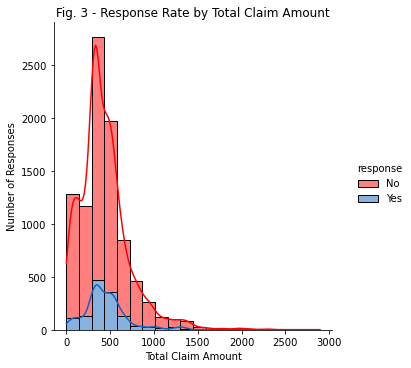

In [14]:
sns.displot(data = df2, x='total claim amount', bins=20, hue='response', palette=["#ff0000", "#1065c0"], multiple='stack', kde=True).set(title='Fig. 3 - Response Rate by Total Claim Amount', xlabel='Total Claim Amount', ylabel = 'Number of Responses')
plt.show()

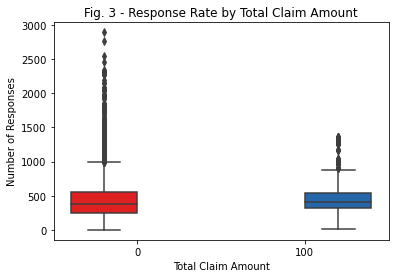

In [15]:
f  = sns.boxplot(x = 'response_rate',y='total claim amount', data=df2, hue='response_rate', palette=["#ff0000", "#1065c0"]).set(title='Fig. 3 - Response Rate by Total Claim Amount', xlabel='Total Claim Amount', ylabel = 'Number of Responses')
plt.legend([],[], frameon=False)

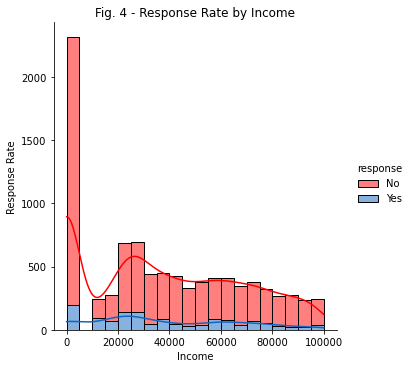

In [16]:
sns.displot(data = df2, x='income', bins=20, hue='response', palette=["#ff0000", "#1065c0"], multiple='stack', kde=True).set(title='Fig. 4 - Response Rate by Income', xlabel='Income', ylabel = 'Response Rate')
plt.show()

## Part 4

In [17]:
display(df2.dtypes)
display(df2.shape)

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

(9134, 27)

In [18]:
numerical = df2.select_dtypes(include=np.number)
display(numerical.dtypes)
display(numerical.shape)

customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
total claim amount               float64
month                              int64
response_rate                      int64
dtype: object

(9134, 10)

In [19]:
df2['effective to date'] =  df2['effective to date'].astype(str)
categorical = df2.select_dtypes(include=np.object)
display(categorical.dtypes)
display(categorical.shape)

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_5624/805786086.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df2.select_dtypes(include=np.object)


customer             object
state                object
response             object
coverage             object
education            object
effective to date    object
employmentstatus     object
gender               object
location code        object
marital status       object
policy type          object
policy               object
renew offer type     object
sales channel        object
vehicle class        object
vehicle size         object
vehicle type         object
dtype: object

(9134, 17)

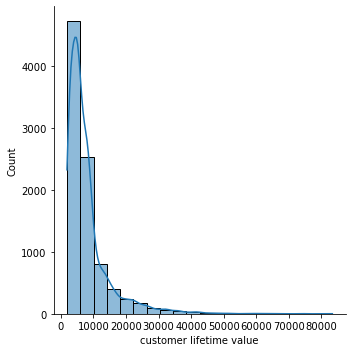

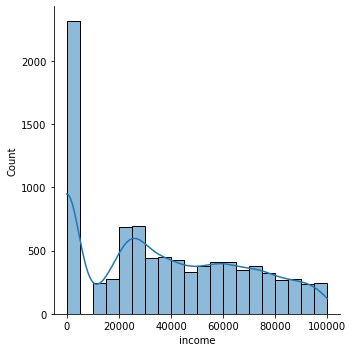

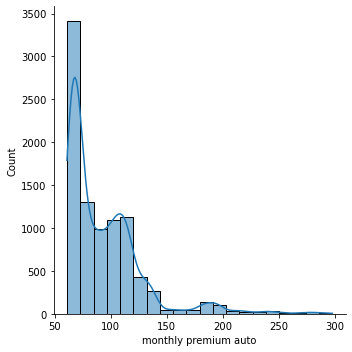

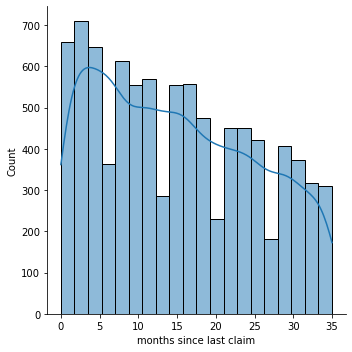

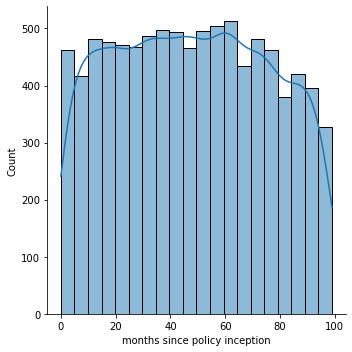

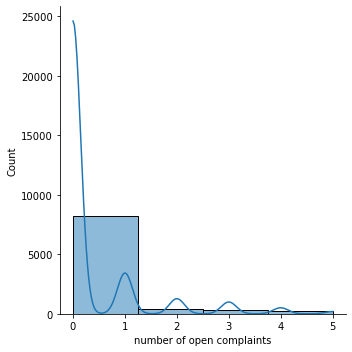

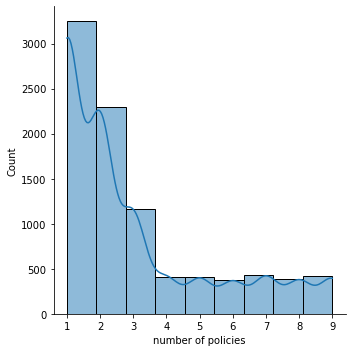

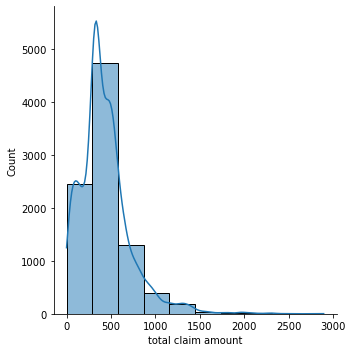

In [20]:
display(sns.displot(numerical['customer lifetime value'], bins = 20,kde = True))
display(sns.displot(numerical['income'], bins = 20,kde = True))
display(sns.displot(numerical['monthly premium auto'], bins = 20,kde = True))
display(sns.displot(numerical['months since last claim'], bins = 20,kde = True))
display(sns.displot(numerical['months since policy inception'], bins = 20,kde = True))
display(sns.displot(numerical['number of open complaints'], bins = 4,kde = True))
display(sns.displot(numerical['number of policies'], bins = 9,kde = True))
display(sns.displot(numerical['total claim amount'], bins = 10,kde = True))



(array([4.726e+03, 2.534e+03, 7.960e+02, 3.970e+02, 2.400e+02, 1.730e+02,
        8.800e+01, 6.600e+01, 4.700e+01, 2.800e+01, 1.300e+01, 7.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1898.007675  ,  5969.37635075, 10040.7450265 , 14112.11370225,
        18183.482378  , 22254.85105375, 26326.2197295 , 30397.58840525,
        34468.957081  , 38540.32575675, 42611.6944325 , 46683.06310825,
        50754.431784  , 54825.80045975, 58897.1691355 , 62968.53781125,
        67039.906487  , 71111.27516275, 75182.6438385 , 79254.01251425,
        83325.38119   ]),
 <BarContainer object of 20 artists>)

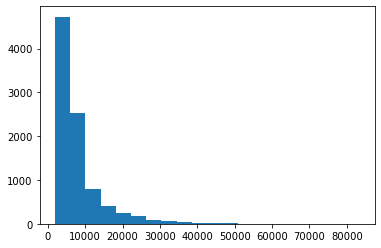

In [21]:
#Use Matplotlib to construct histograms

display(plt.hist(numerical['customer lifetime value'], bins = 20))


(array([2317.,    0.,  247.,  275.,  690.,  691.,  441.,  452.,  422.,
         327.,  381.,  410.,  410.,  349.,  375.,  323.,  271.,  274.,
         238.,  241.]),
 array([    0.  ,  4999.05,  9998.1 , 14997.15, 19996.2 , 24995.25,
        29994.3 , 34993.35, 39992.4 , 44991.45, 49990.5 , 54989.55,
        59988.6 , 64987.65, 69986.7 , 74985.75, 79984.8 , 84983.85,
        89982.9 , 94981.95, 99981.  ]),
 <BarContainer object of 20 artists>)

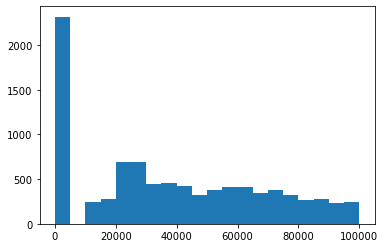

In [22]:
display(plt.hist(numerical['income'], bins = 20))


(array([3413., 1302.,  983., 1091., 1127.,  426.,  262.,   48.,   41.,
          39.,  141.,  106.,   38.,   24.,   16.,   29.,   10.,   11.,
          19.,    8.]),
 array([ 61.  ,  72.85,  84.7 ,  96.55, 108.4 , 120.25, 132.1 , 143.95,
        155.8 , 167.65, 179.5 , 191.35, 203.2 , 215.05, 226.9 , 238.75,
        250.6 , 262.45, 274.3 , 286.15, 298.  ]),
 <BarContainer object of 20 artists>)

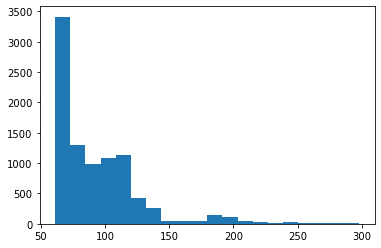

In [23]:
display(plt.hist(numerical['monthly premium auto'], bins = 20))


(array([659., 710., 648., 364., 612., 556., 570., 285., 554., 558., 475.,
        231., 451., 450., 422., 182., 407., 372., 317., 311.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  ]),
 <BarContainer object of 20 artists>)

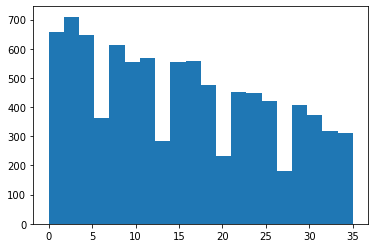

In [24]:
display(plt.hist(numerical['months since last claim'], bins = 20))


(array([462., 416., 482., 476., 471., 467., 487., 497., 494., 466., 495.,
        505., 513., 435., 482., 462., 380., 421., 395., 328.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <BarContainer object of 20 artists>)

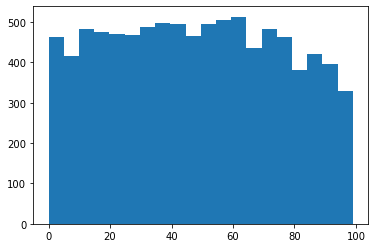

In [25]:
display(plt.hist(numerical['months since policy inception'], bins = 20))


(array([8263.,  374.,  292.,  205.]),
 array([0.  , 1.25, 2.5 , 3.75, 5.  ]),
 <BarContainer object of 4 artists>)

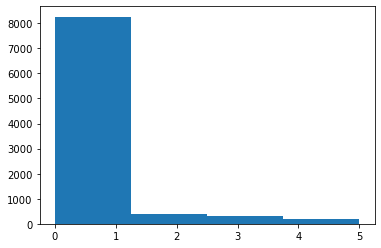

In [26]:
display(plt.hist(numerical['number of open complaints'], bins = 4))


(array([3251., 2294., 1168.,  409.,  407.,  372.,  433.,  384.,  416.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

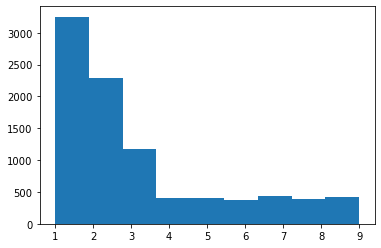

In [27]:
display(plt.hist(numerical['number of policies'], bins = 9))


(array([1.279e+03, 1.171e+03, 2.764e+03, 1.971e+03, 8.450e+02, 4.570e+02,
        2.650e+02, 1.210e+02, 1.010e+02, 8.200e+01, 2.500e+01, 1.100e+01,
        1.200e+01, 1.100e+01, 8.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([9.90070000e-02, 1.44756041e+02, 2.89413074e+02, 4.34070108e+02,
        5.78727141e+02, 7.23384175e+02, 8.68041208e+02, 1.01269824e+03,
        1.15735528e+03, 1.30201231e+03, 1.44666934e+03, 1.59132638e+03,
        1.73598341e+03, 1.88064044e+03, 2.02529748e+03, 2.16995451e+03,
        2.31461154e+03, 2.45926858e+03, 2.60392561e+03, 2.74858264e+03,
        2.89323968e+03]),
 <BarContainer object of 20 artists>)

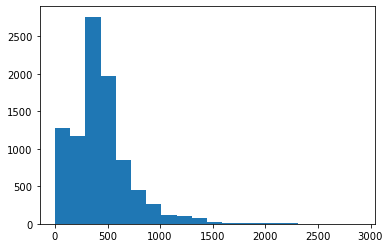

In [28]:
display(plt.hist(numerical['total claim amount'], bins = 20))

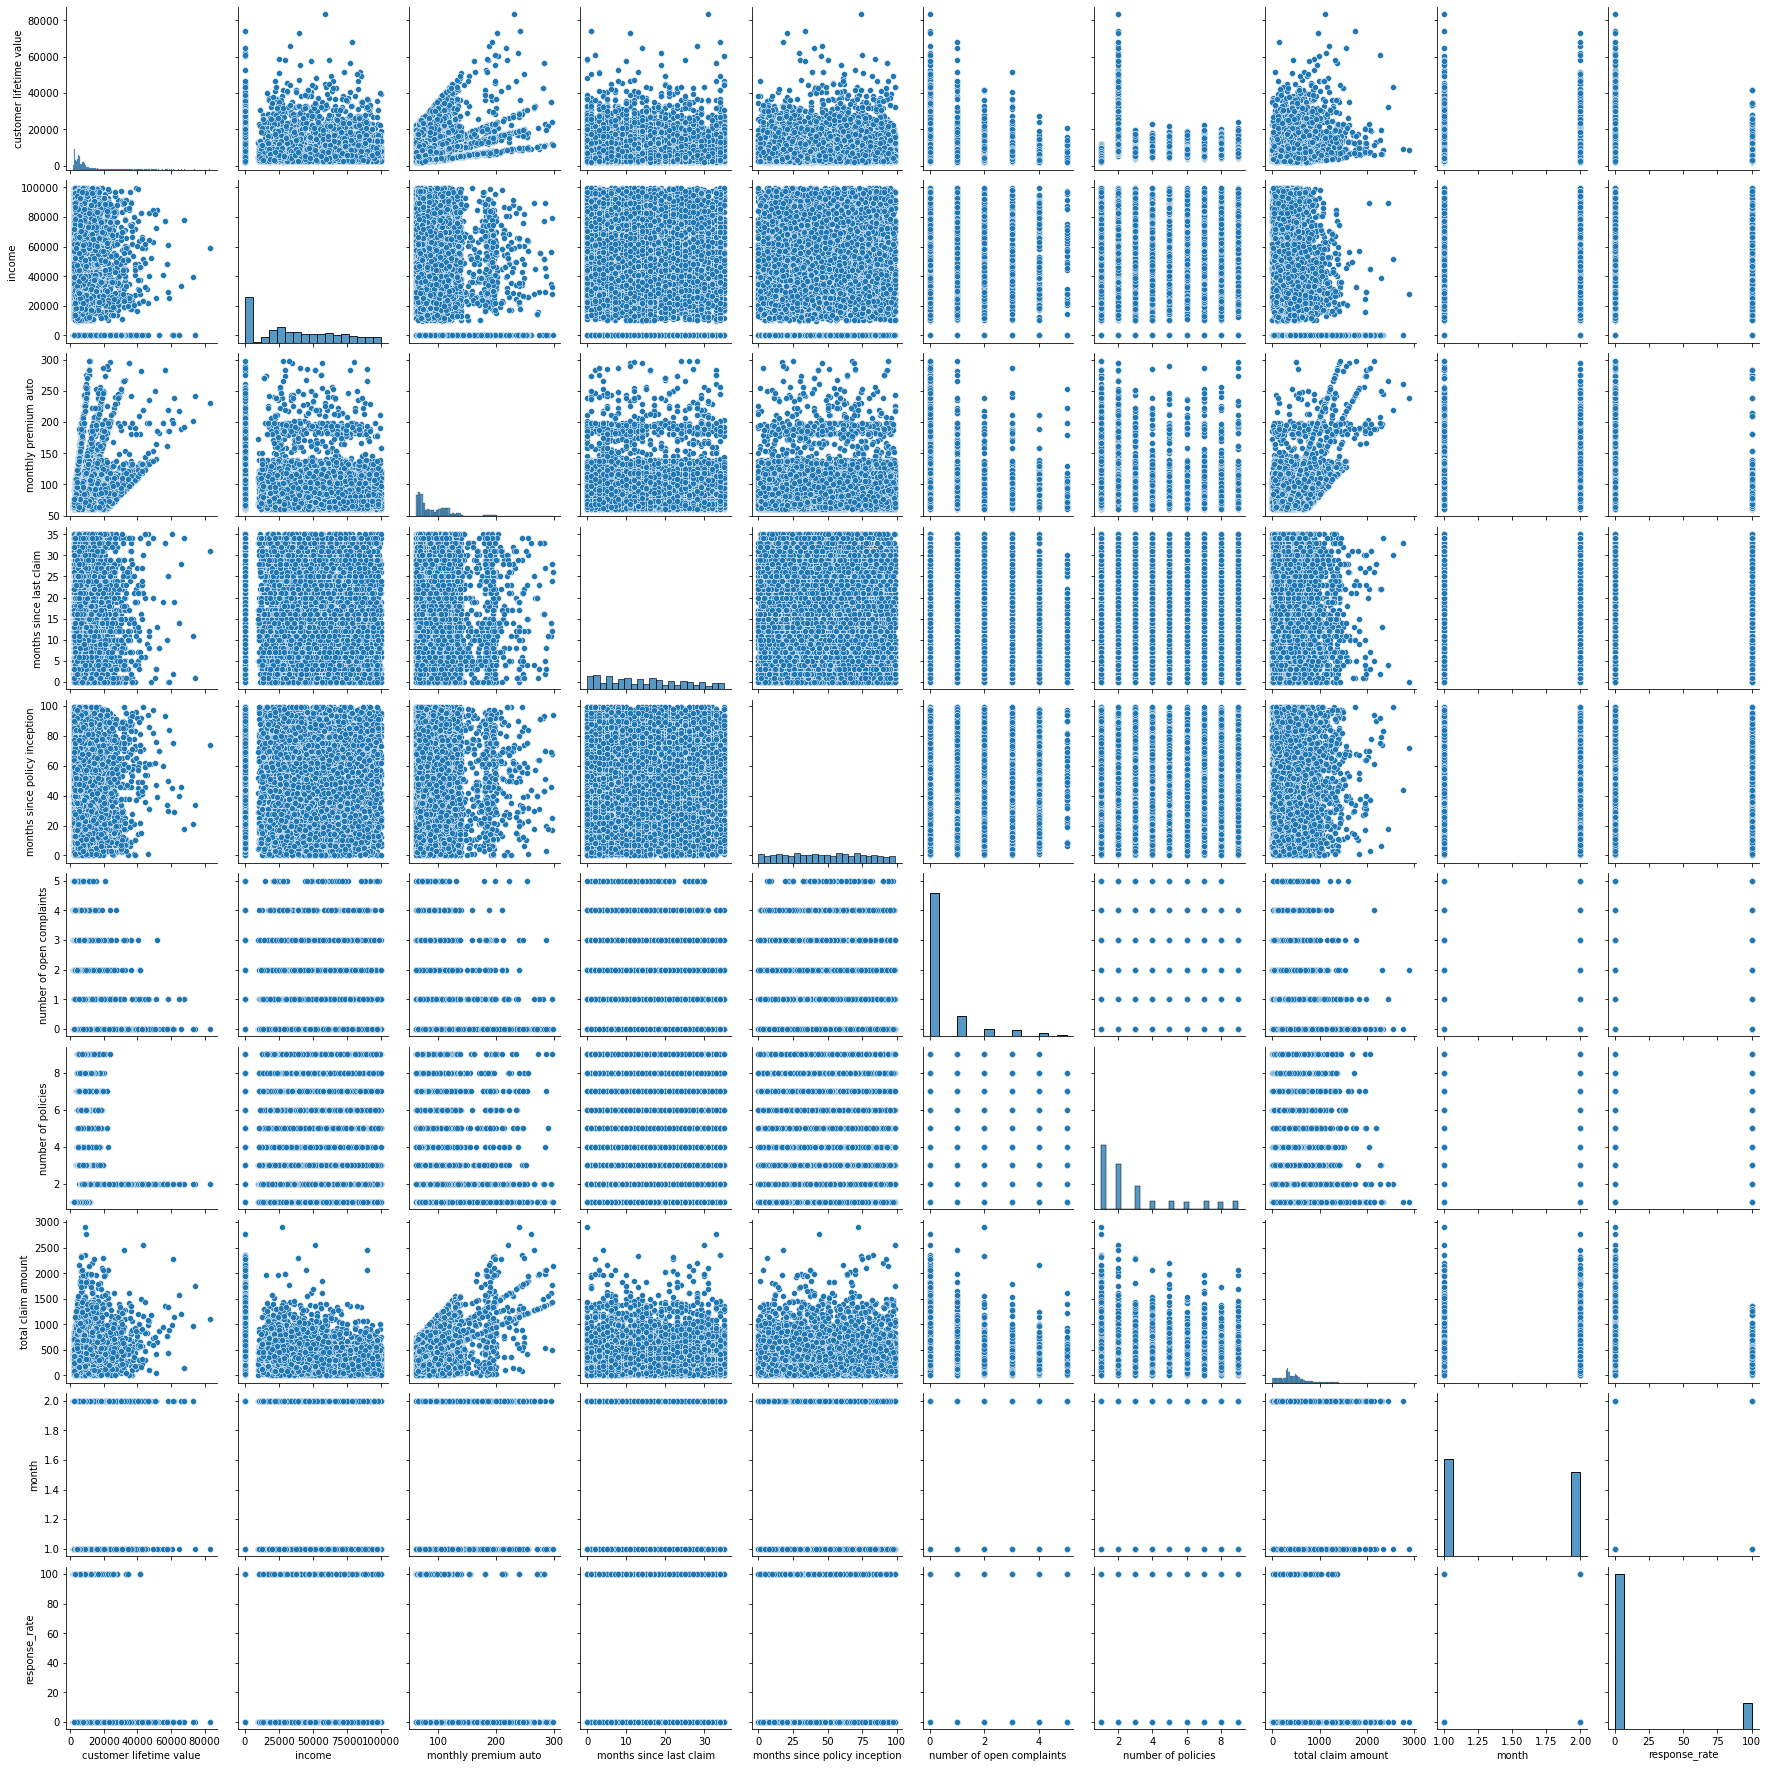

In [29]:
sns.pairplot(numerical)

In [30]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable

numerical.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_rate
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096,-0.008930
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169,0.011932
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467,0.010966
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921,-0.016597
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010,0.002952
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335,-0.009881
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305,-0.020891
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820,0.016877
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000,-0.034221
response_rate,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,-0.034221,1.000000


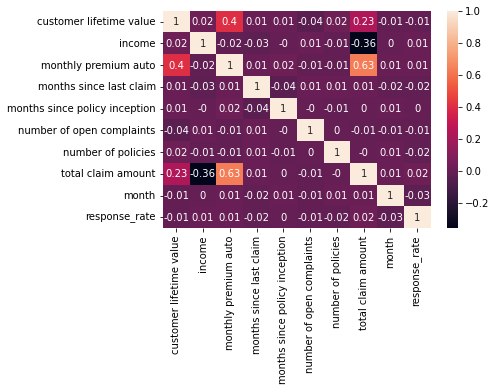

In [31]:
correlations_matrix = round(numerical.corr(),2)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Round 5

<AxesSubplot:xlabel='monthly premium auto', ylabel='total claim amount'>

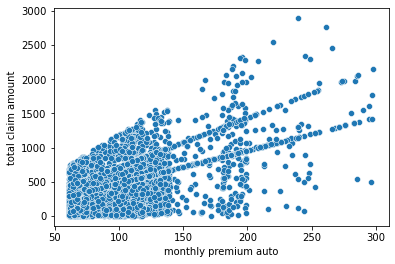

In [32]:
sns.scatterplot(x='monthly premium auto', y='total claim amount', data = numerical)

In [33]:
#Determine values of x and y. X is a dataframe because it's the target
y = numerical['total claim amount']
X = numerical[['monthly premium auto']]

In [34]:
lm = linear_model.LinearRegression()

In [35]:
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

-63.32929837275617
[5.33599955]


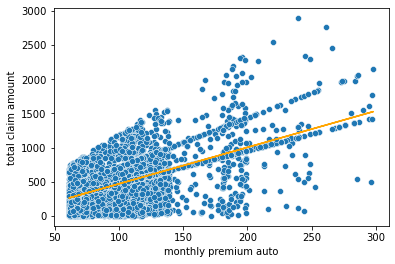

In [36]:
regression_line = lm.intercept_ + lm.coef_[0]*numerical['monthly premium auto']
plt.plot(numerical['monthly premium auto'], regression_line, c = 'orange')
sns.scatterplot(x='monthly premium auto',y='total claim amount',data=numerical)
plt.show()

In [37]:
lm.predict([[10],[100],[200],[300],[400],[500],[1000]])

array([  -9.96930285,  470.27065683, 1003.87061204, 1537.47056724,
       2071.07052245, 2604.67047765, 5272.67025368])

In [38]:
print("R2 score is",lm.score(X,y))

y_pred = lm.predict(X)
print("Mean squared error (MSE) is",mean_squared_error(y_pred,y))
print("MSE fitted line is ", round(mean_squared_error(regression_line, y),2))

R2 score is 0.3994450617021763
Mean squared error (MSE) is 50675.464802798284
MSE fitted line is  50675.46


#### Normalise the numerical data

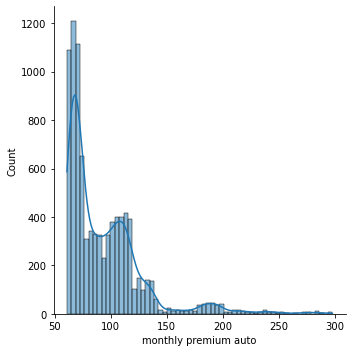

In [39]:
display(sns.displot(numerical['monthly premium auto'],kde = True))

In [40]:
#describe the table
numerical['monthly premium auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: monthly premium auto, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


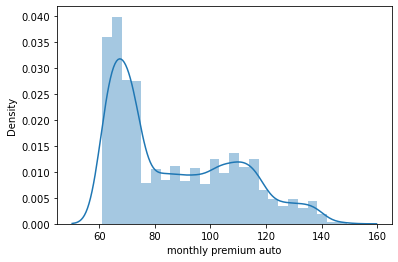

In [41]:
iqr = np.percentile(numerical['monthly premium auto'],75) - np.percentile(numerical['monthly premium auto'],25)
upper_limit = np.percentile(numerical['monthly premium auto'],75) + 1.5*iqr
lower_limit = np.percentile(numerical['monthly premium auto'],25) - 1.5*iqr

data3 = numerical[(numerical['monthly premium auto']>np.percentile(numerical['monthly premium auto'],25) - 1*iqr) & (numerical['monthly premium auto']<np.percentile(numerical['monthly premium auto'],75) + 1*iqr)].copy()
sns.distplot(data3['monthly premium auto'])
plt.show()


In [ ]:
hello
def log_transfom_cleanz(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 

    
numerical['mpa_log'] = list(map(log_transfom_cleanz, numerical['monthly premium auto']))
numerical['mpa_log'] = numerical['mpa_log'].fillna(np.mean(numerical['mpa_log']))



sns.displot(numerical['mpa_log'], kde=True)
plt.show()


In [42]:
transformer = MinMaxScaler().fit(numerical)
x_normalized = transformer.transform(numerical)
print(x_normalized.shape)
x_normalized

ABC = pd.DataFrame(x_normalized, columns=numerical.columns)

(9134, 10)


In [43]:
ABC

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_rate
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,0.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485,1.0,0.0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034,1.0,1.0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297,1.0,0.0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876,1.0,0.0


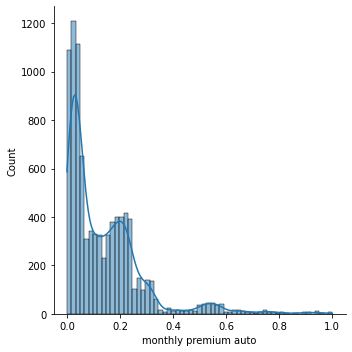

In [45]:
display(sns.displot(ABC['monthly premium auto'], kde=True))

In [ ]:
transformer2 = StandardScaler().fit(numerical)
x_standardized = transformer2.transform(numerical)
print(x_standardized.shape)
CBA = pd.DataFrame(x_standardized, columns=numerical.columns)

In [46]:
display(sns.displot(CBA['monthly premium auto'], kde=True))

NameError: name 'CBA' is not defined